In [ ]:


import numpy as np
np.random.seed(4)
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler






#[dataset['AirTemp'].iloc[0:8700]]

In [ ]:
dataset=pd.read_csv('https://raw.githubusercontent.com/sadoky/Pandas/master/1.232462_-77.293538_Solcast_PT5M.csv')


In [ ]:
set_entrenamiento1= (dataset["Ghi"].iloc[0:6000])
set_validacion1 = dataset["Ghi"].iloc[6000:8000]

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
set_entrenamiento=set_entrenamiento1.values.reshape(-1,1)
set_entrenamiento_escalado = sc.fit_transform(set_entrenamiento)

In [ ]:
time_step = 60
X_train = []
Y_train = []
m = len(set_entrenamiento_escalado)

for i in range(time_step,m):
    # X: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
    X_train.append(set_entrenamiento_escalado[i-time_step:i,0])

    # Y: el siguiente dato
    Y_train.append(set_entrenamiento_escalado[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import GRU, Dense

In [ ]:
dim_entrada = (X_train.shape[1],1)
dim_salida = 1
na = 50

In [ ]:
batch_size = 20
steps_per_epoch = 20
validation_steps =20

In [ ]:
modelo = Sequential()

In [ ]:
modelo.add(GRU(units=na, input_shape=dim_entrada))

In [ ]:
modelo.add(Dense(units=dim_salida))

In [ ]:
from keras.callbacks import learning_rate_schedule
modelo.compile(optimizer="adam", loss='mse',metrics=['acc'])

In [ ]:
history=modelo.fit(X_train,Y_train, validation_split=0.33,epochs=20,batch_size=32,verbose=1)


Epoch 1/20
125/125 [==============================] - 5s 38ms/step - loss: 1.4185e-04 - acc: 0.4866 - val_loss: 1.3376e-04 - val_acc: 0.4941
Epoch 2/20
125/125 [==============================] - 4s 34ms/step - loss: 1.5327e-04 - acc: 0.4866 - val_loss: 1.4741e-04 - val_acc: 0.4941
Epoch 3/20
125/125 [==============================] - 4s 33ms/step - loss: 1.5010e-04 - acc: 0.4866 - val_loss: 1.3671e-04 - val_acc: 0.4941
Epoch 4/20
125/125 [==============================] - 4s 34ms/step - loss: 1.4262e-04 - acc: 0.4866 - val_loss: 1.3932e-04 - val_acc: 0.4941
Epoch 5/20
125/125 [==============================] - 4s 33ms/step - loss: 1.4312e-04 - acc: 0.4866 - val_loss: 1.3370e-04 - val_acc: 0.4941
Epoch 6/20
125/125 [==============================] - 4s 33ms/step - loss: 1.4801e-04 - acc: 0.4866 - val_loss: 1.6899e-04 - val_acc: 0.4941
Epoch 7/20
125/125 [==============================] - 4s 33ms/step - loss: 1.4878e-04 - acc: 0.4866 - val_loss: 1.3996e-04 - val_acc: 0.4941
Epoch 8/20
12

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


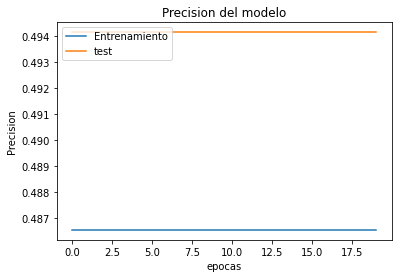

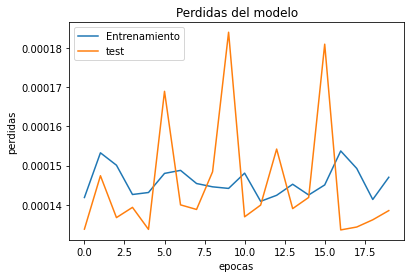

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Precision del modelo')
plt.ylabel('Precision')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()
# hacemos las grafica 2 perdidas
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdidas del modelo')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

<Figure size 432x288 with 0 Axes>

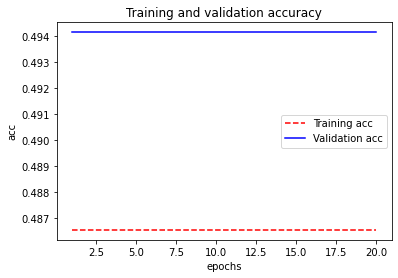

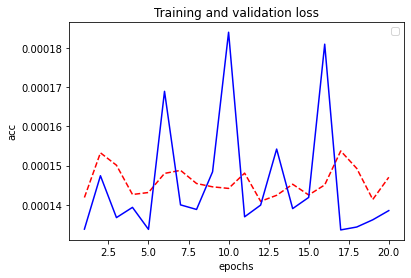

<Figure size 432x288 with 0 Axes>

In [ ]:
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(1,len(acc)+1,1)

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     loss, 'r--' )
plt.plot ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

In [ ]:


history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy'])


In [ ]:
x_test = set_validacion1.values
x_test=x_test.reshape(-1,1)
x_test = sc.transform(x_test)

In [ ]:
X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
prediccion = modelo.predict(X_test)
prediccion = sc.inverse_transform(prediccion)
prediccion2=pd.DataFrame(prediccion)


In [ ]:
prediccion2


,0
0,4.389617
1,4.402330
2,4.412980
3,4.421824
4,4.429029
...,...
1935,415.178406
1936,450.003204
1937,401.556488
1938,381.320160


In [ ]:
xaxis=np.arange(start=0,stop=43500,step=5)



In [ ]:
url='https://raw.githubusercontent.com/sadoky/Pandas/master/1.232462_-77.293538_Solcast_PT5M.csv'
df=pd.read_csv(url)
datos_train=df["Ghi"].iloc[0:6000]
datos_val=df["Ghi"].iloc[6000:8000]

datos_val


6000    476
6001    525
6002    488
6003    393
6004    391
       ... 
7995    419
7996    416
7997    385
7998    396
7999    434
Name: Ghi, Length: 2000, dtype: int64

In [ ]:
from numpy.matrixlib.defmatrix import concatenate

j=np.zeros(6055,int)
pred44=pd.DataFrame(j)
pred56=np.asarray(prediccion2,dtype=np.float64)

pred56=pred56.reshape(-1,1)
pred57=j.reshape(-1,1)
pred56





array([[  4.38961744],
       [  4.40232992],
       [  4.41298008],
       ...,
       [401.55648804],
       [381.32015991],
       [431.61309814]])

In [ ]:
lim=np.concatenate((pred57,pred56))
lim
lim2=pd.DataFrame(lim)
prediccion_final=lim2[6000:]

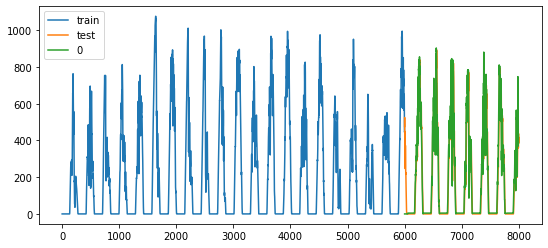

In [ ]:
fig, ax = plt.subplots(figsize=(9, 4))
datos_train.plot(ax=ax, label='train')
datos_val.plot(ax=ax, label='test')
prediccion_final.plot(ax=ax,label="predict")

ax.legend();

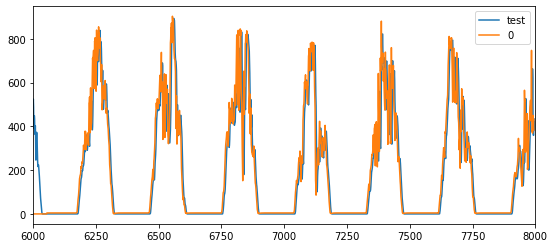

In [ ]:
fig, ax = plt.subplots(figsize=(9, 4))
#datos_train.plot(ax=ax, label='train')
datos_val.plot(ax=ax, label='test')
lim2.plot(ax=ax, label='predict')
plt.xlim(6000,8000)
ax.legend();



